# Central limit theorem 
The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

In [2]:
# dark theme
plt.style.use("dark_background")

Creating data for simulation

In [12]:
# setting the seed for reproducibility
np.random.seed(65)
data = np.random.randint(0, 10, size=10000)

In [273]:
def map_range(val, low1, high1, low2, high2):
    # range_1 = (high1 - low1)
    # range_2 = (high2 - low2)
    # ratio = range_2 / range_1
    # return low2 + (val - low1) * ratio
    return low2 + (high2 - low2) * (val - low1) / (high1 - low1)
print(map_range(7, 0, 10, 0, 1))

0.7


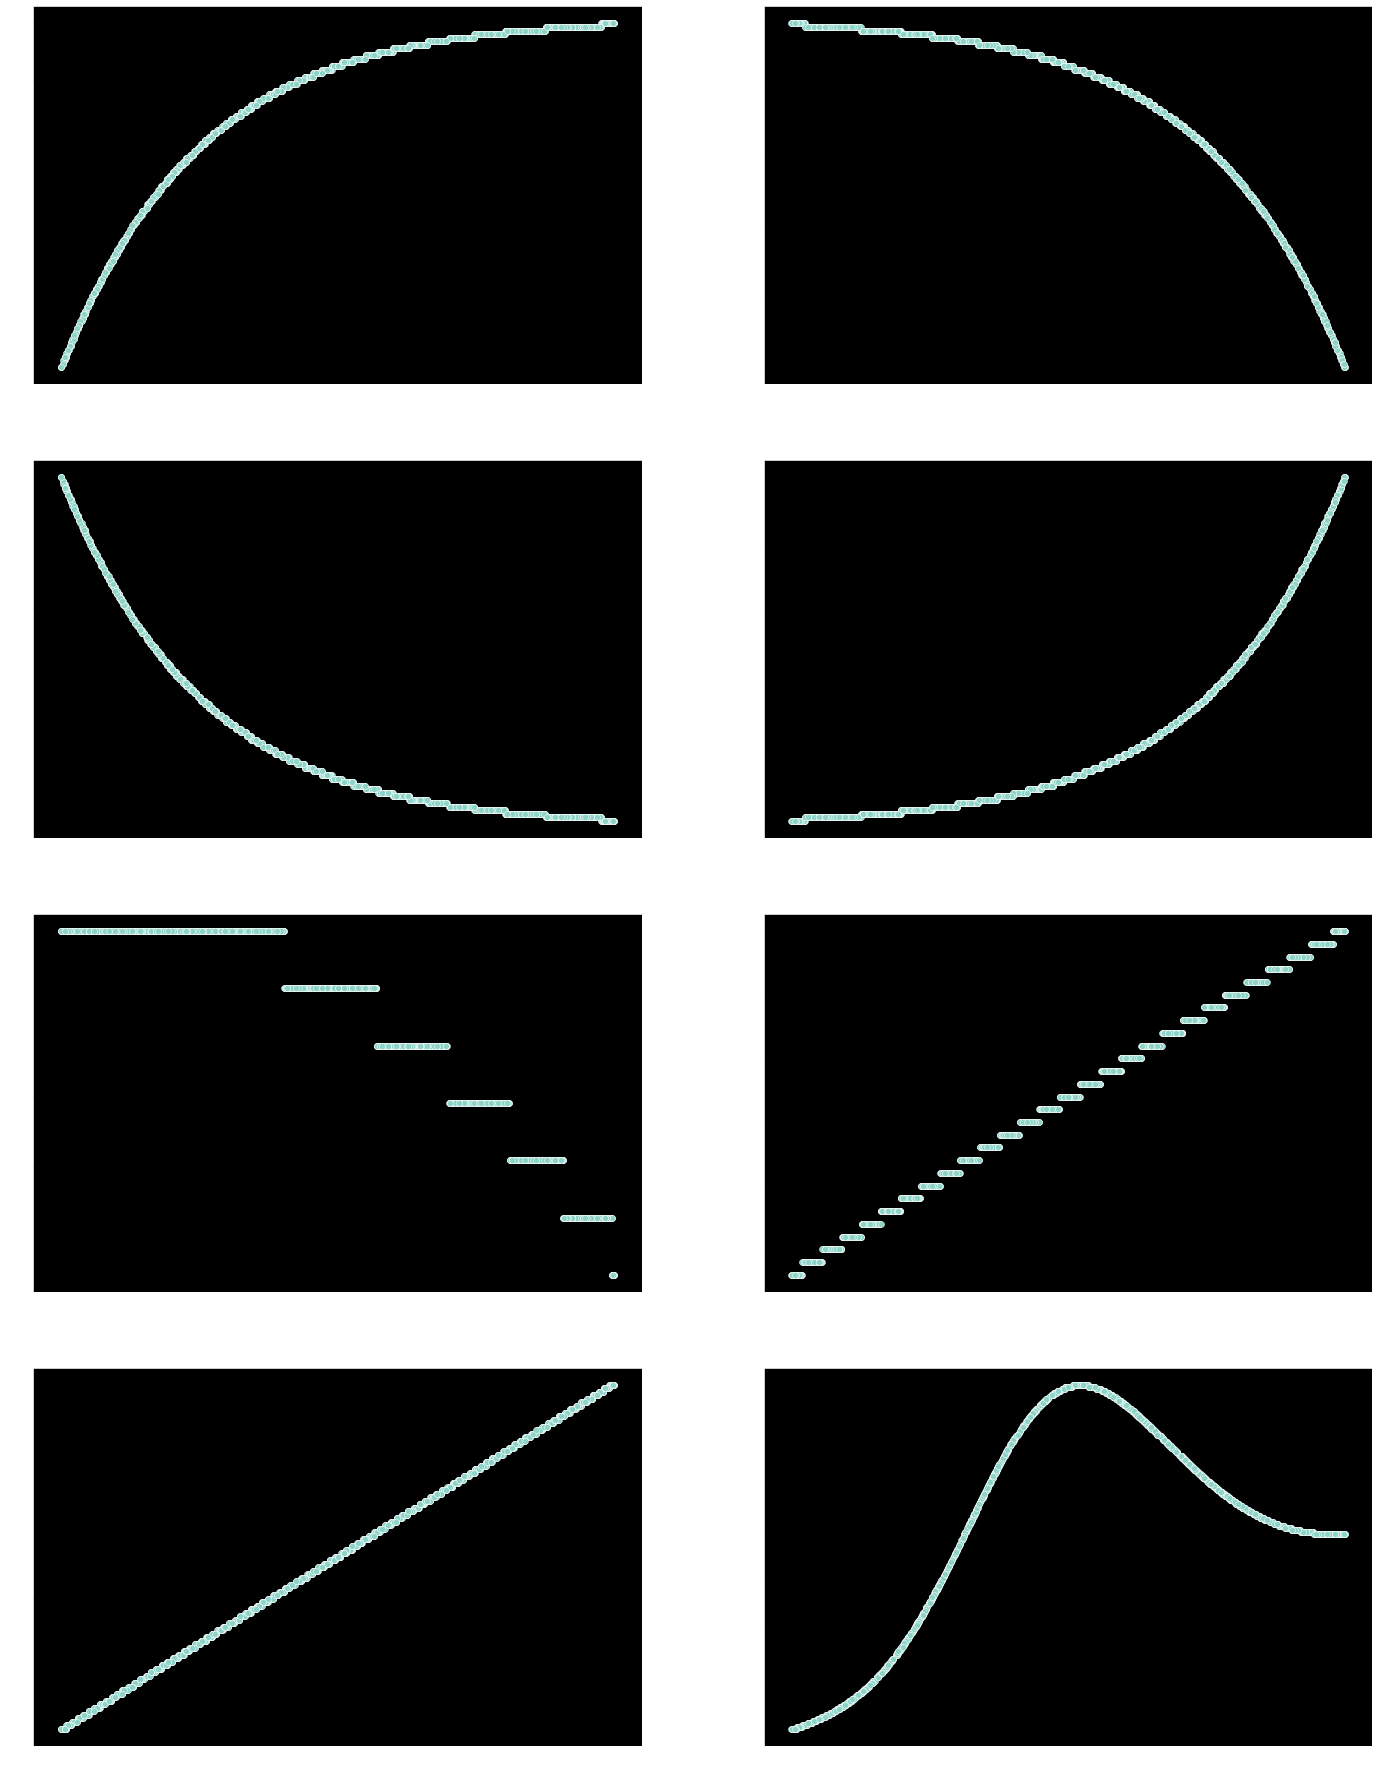

In [313]:
import probability_density_functions as pdf
funcs = [
    (pdf.PDF_90E,"PDF_90E"),
    (pdf.PDF_180E,"PDF_180E"),
    (pdf.PDF_E,"PDF_E"),
    (pdf.PDF_270E,"PDF_270E"),
    (pdf.PDF_COS,"PDF_COS"),
    (pdf.PDF_SIN,"PDF_SIN"),
    (pdf.PDF_LINEAR,"PDF_LINEAR"),
    (pdf.PDF_SQUARE,"PDF_SQUARE"),
]

x = np.linspace(0, 1, 100_000)
x = np.random.choice(x, size=2_000)

data = {}

num_rows = (len(funcs)//2 + len(funcs)%2)
fig, ax =  plt.subplots(nrows=num_rows, ncols=2, figsize=(12*2, 8*num_rows))

for idx, tup in enumerate(funcs):
    func, label = tup
    y = list(map(lambda val : int(map_range(val, 0, 1, 1, 100)), func(x)))
    data[label] = y
    sns.scatterplot(x=x, y=y, ax=ax[idx//2][idx%2])


In [316]:
data = pd.DataFrame(data)
data

,PDF_90E,PDF_180E,PDF_E,PDF_270E,PDF_COS,PDF_SIN,PDF_LINEAR,PDF_SQUARE
0,97,21,3,79,94,69,94,99
1,97,32,3,68,95,68,90,101
2,13,97,87,3,99,44,4,4
3,95,56,5,44,96,65,79,116
4,83,88,17,12,98,56,46,165
...,...,...,...,...,...,...,...,...
1995,94,64,6,36,96,64,74,127
1996,95,62,5,38,96,64,75,124
1997,59,95,41,5,99,49,23,53
1998,95,62,5,38,96,64,76,124


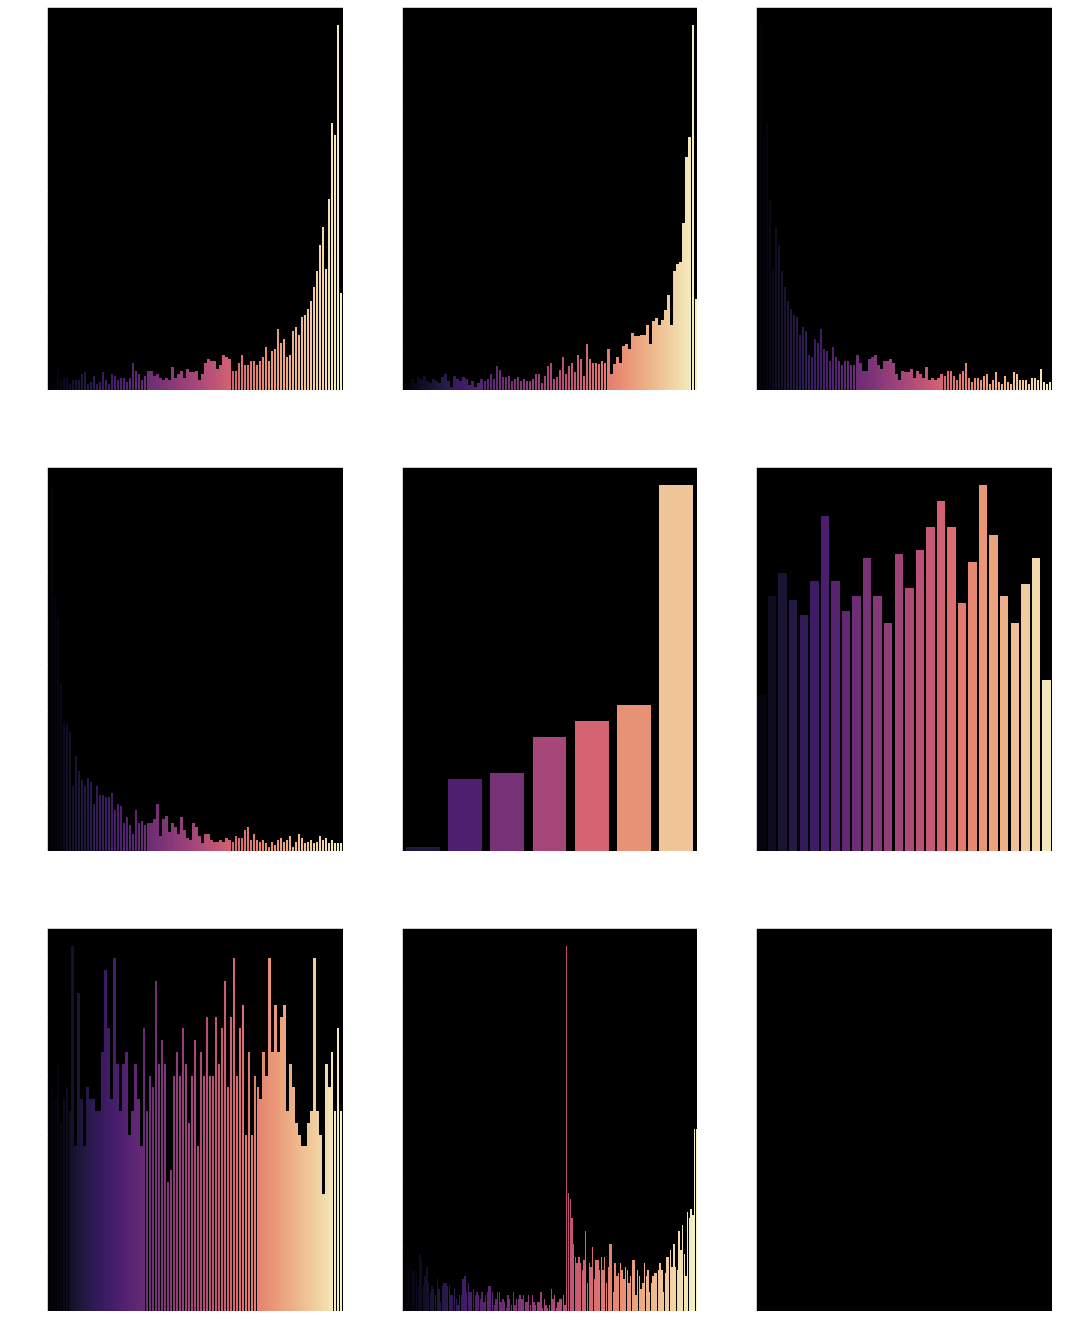

In [322]:

cols = data.columns
items_per_row = 3
num_rows = len(cols)//items_per_row + (1 if len(cols)%items_per_row else 0)

fig, ax = plt.subplots(nrows=num_rows, ncols=items_per_row,figsize=(6*items_per_row, 8*num_rows))

for idx, label in enumerate(cols):
    sns.countplot(x=label, data=data,
    ax=ax[idx//items_per_row, idx % items_per_row],
        palette="magma"
    ).set_xticks([])

In [328]:
means_lst = {label: [] for label in data.columns}
batch_size = 100
no_itr = 10_000

for label in data.columns:
    for _ in range(no_itr):
        batch = np.random.choice(data[label], batch_size)
        mean = batch.mean()
        means_lst[label].append(mean)

means_data = pd.DataFrame(means_lst)

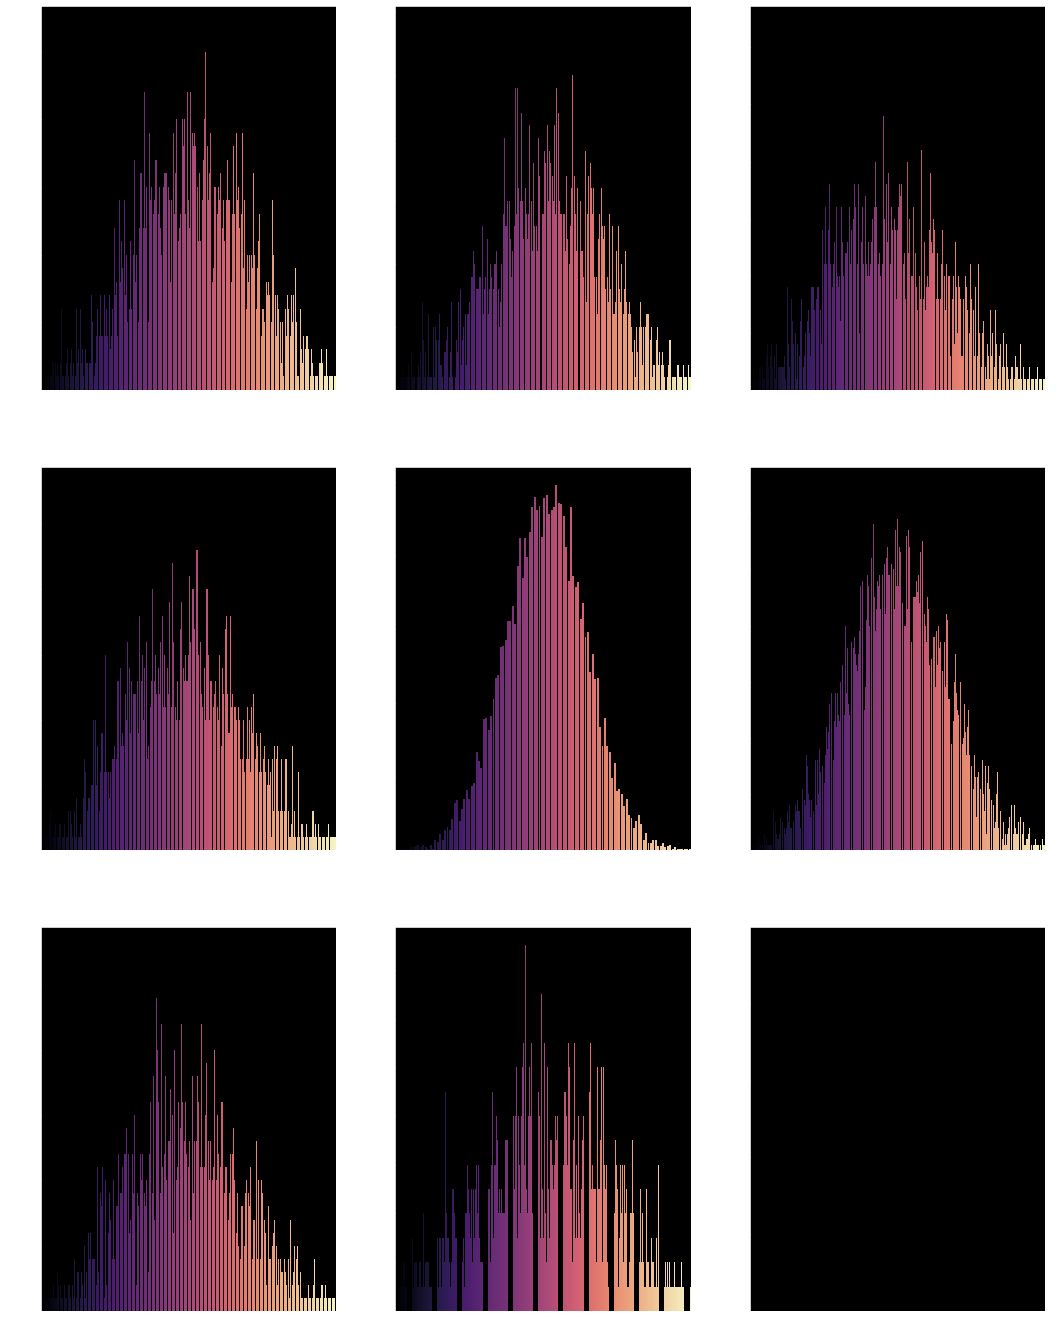

In [329]:
cols = means_data.columns

items_per_row = 3
num_rows = len(cols)//items_per_row + (1 if len(cols)%items_per_row else 0)
fig, ax = plt.subplots(nrows=num_rows, ncols=items_per_row,figsize=(6*items_per_row, 8*num_rows))

for idx, label in enumerate(cols):
    sns.countplot(x=label, data=means_data,
        ax=ax[idx//items_per_row, idx % items_per_row],
        palette="magma").set_xticklabels([])

Even for different samples having differnet distribuitons, the distribution of sample means is the same i.e ressembling bell curve or normal distribution.